# Real Estate vs Income Dashboard

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from panel.interact import interact
from dotenv import load_dotenv


Bad key "text.kerning_factor" on line 4 in
C:\Users\akgoel\.conda\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read the Mapbox API key
load_dotenv()
mapbox_api = os.getenv("mapbox_key")
px.set_mapbox_access_token(mapbox_api)

In [3]:
# ZALL framework
prop_value_zall = pd.read_csv(Path("../data/clean_data/zillow_data_houston_sa_austin_dallas.csv"), header = 0, usecols = ["YEAR","AVG_PROP","ZIPCODE","CITY"], names = ["YEAR","REGION","AVG_PROP","ZIPCODE","CITY"], infer_datetime_format=True, parse_dates=True)[["YEAR","ZIPCODE","CITY","AVG_PROP"]]
prop_value_zall["YEAR"] = pd.DatetimeIndex(prop_value_zall["YEAR"]).year

avg_income_df = pd.read_csv(Path("../data/clean_data/avg_income.csv"), header = 0, names = ["YEAR","ZIPCODE","AVG_INCOME"], infer_datetime_format=True, parse_dates=True, dtype = {"avg_income" : np.float64})

lat_long_df = pd.read_excel(Path("../data/lat_long_by_zip_code.xlsx"), header = 0, usecols = ["Zip Code","Latitude","Longitude"])
lat_long_df = lat_long_df.rename(columns = {"Zip Code": "ZIPCODE", "Latitude": "LATITUDE" ,"Longitude": "LONGITUDE"})

zall_df = pd.merge(pd.merge(avg_income_df, prop_value_zall, how = "inner", on = ["YEAR", "ZIPCODE"]), lat_long_df, how = "inner", on = "ZIPCODE")

zall_df["OPPORTUNITY_RATIO"] = zall_df["AVG_INCOME"].astype(float) / zall_df["AVG_PROP"].astype(float)
zall_df = zall_df.groupby(["YEAR", "CITY", "ZIPCODE"], as_index = True).mean()

In [4]:
# RSNA framework
prop_value_rsna = pd.read_csv(Path("../data/clean_data/RSNA.csv"), header = 0, usecols = ["YEAR","AVG_PROP","ZIPCODE","CITY"], names = ["YEAR","REGION","AVG_PROP","ZIPCODE","CITY"], infer_datetime_format=True, parse_dates=True)[["YEAR","ZIPCODE","CITY","AVG_PROP"]]
prop_value_rsna["YEAR"] = pd.DatetimeIndex(prop_value_rsna["YEAR"]).year

rsna_df = pd.merge(pd.merge(avg_income_df, prop_value_rsna, how = "inner", on = ["YEAR", "ZIPCODE"]), lat_long_df, how = "inner", on = "ZIPCODE")
rsna_df["OPPORTUNITY_RATIO"] = rsna_df["AVG_INCOME"].astype(float) / rsna_df["AVG_PROP"].astype(float)
rsna_df = rsna_df.groupby(["YEAR", "CITY", "ZIPCODE"], as_index = True).mean()

In [5]:
# ZCON framework
prop_value_zcon = pd.read_csv(Path("../data/clean_data/ZCON.csv"), header = 0, usecols = ["YEAR","AVG_PROP","ZIPCODE","CITY"], names = ["YEAR","REGION","AVG_PROP","ZIPCODE","CITY"], infer_datetime_format=True, parse_dates=True)[["YEAR","ZIPCODE","CITY","AVG_PROP"]]
prop_value_zcon["YEAR"] = pd.DatetimeIndex(prop_value_zcon["YEAR"]).year

zcon_df = pd.merge(pd.merge(avg_income_df, prop_value_zcon, how = "inner", on = ["YEAR", "ZIPCODE"]), lat_long_df, how = "inner", on = "ZIPCODE")
zcon_df["OPPORTUNITY_RATIO"] = zcon_df["AVG_INCOME"].astype(float) / zcon_df["AVG_PROP"].astype(float)
zcon_df = zcon_df.groupby(["YEAR", "CITY", "ZIPCODE"], as_index = True).mean()

In [6]:
zall_agi_v_prop_df = zall_df
zcon_agi_v_prop_df = zcon_df
rsna_agi_v_prop_df = rsna_df

In [7]:
# for maps to work
zall_df = zall_df.reset_index()
zcon_df = zcon_df.reset_index()
rsna_df = rsna_df.reset_index()

In [8]:
# ZALL
ts_zall = zall_df.groupby(["CITY","YEAR"]).mean()
ts_zall.reset_index(inplace=True)

zall_austin = ts_zall[ts_zall["CITY"] =="Austin"]
zall_houston = ts_zall[ts_zall["CITY"] =="Houston"]
zall_dallas = ts_zall[ts_zall["CITY"] =="Dallas"]
zall_san_ant = ts_zall[ts_zall["CITY"] =="San Antonio"]
zall_fw = ts_zall[ts_zall["CITY"] =="Fort Worth"]

# ZCON
ts_zcon = zcon_df.groupby(["CITY","YEAR"]).mean()
ts_zcon.reset_index(inplace=True)

zcon_austin = ts_zcon[ts_zcon["CITY"] =="Austin"]
zcon_houston = ts_zcon[ts_zcon["CITY"] =="Houston"]
zcon_dallas = ts_zcon[ts_zcon["CITY"] =="Dallas"]
zcon_san_ant = ts_zcon[ts_zcon["CITY"] =="San Antonio"]
zcon_fw = ts_zcon[ts_zcon["CITY"] =="Fort Worth"]

# RSNA
ts_rsna = rsna_df.groupby(["CITY","YEAR"]).mean()
ts_rsna.reset_index(inplace=True)

rsna_austin = ts_rsna[ts_rsna["CITY"] =="Austin"]
rsna_houston = ts_rsna[ts_rsna["CITY"] =="Houston"]
rsna_dallas = ts_rsna[ts_rsna["CITY"] =="Dallas"]
rsna_san_ant = ts_rsna[ts_rsna["CITY"] =="San Antonio"]
rsna_fw = ts_rsna[ts_rsna["CITY"] =="Fort Worth"]

# Panel Visualizations

In [9]:
# Define Panel Visualization Functions
# each needs subdivision for ZALL, ZCON, & NSRA
# Income by City
def avg_income():
    city_avg_inc = plt.figure()

    plt.plot("YEAR", "AVG_INCOME", data= zall_austin, label="Austin")
    plt.plot("YEAR", "AVG_INCOME", data= zall_houston, label="Houston")
    plt.plot("YEAR", "AVG_INCOME", data= zall_dallas, label="Dallas")
    plt.plot("YEAR", "AVG_INCOME", data= zall_san_ant, label="San Antonio")
    plt.plot("YEAR", "AVG_INCOME", data= zall_fw, label="Ft Worth")

    plt.title("Average Income 2007-2018 by City")
    plt.xlabel("Year")
    plt.ylabel("Property Value")
    plt.legend()
    return city_avg_inc

# AGI V PROP 
def zall_agi_v_prop():
    """Average Income & ZALL Property Values 2007-2018"""
    
    all_time_IVP_city_df = zall_agi_v_prop_df.drop(["LATITUDE","LONGITUDE","OPPORTUNITY_RATIO"], axis=1)
    all_time_IVP_city_df = all_time_IVP_city_df.groupby("CITY").mean()
    
    city_gb_yr_plot= all_time_IVP_city_df.hvplot.bar(rot=90, title="Average Income & Property Values 2007-2018",  multi_level=False)
#     city_gb_yr_plot.set_ylabel("Amount in USD")
    
    return city_gb_yr_plot

def zcon_agi_v_prop():
    """Average Income & ZCON Property Values 2007-2018"""
    
    all_time_IVP_city_df = zcon_agi_v_prop_df.drop(["LATITUDE","LONGITUDE","OPPORTUNITY_RATIO"], axis=1)
    all_time_IVP_city_df = all_time_IVP_city_df.groupby("CITY").mean()

    city_gb_yr_plot= all_time_IVP_city_df.plot.bar(title="Average Income & Property Values 2007-2018")
    city_gb_yr_plot.set_ylabel("Amount in USD")
    return city_gb_yr_plot

def rsna_agi_v_prop():
    """Average Income & RSNA Property Values 2007-2018"""
    
    all_time_IVP_city_df = rsna_agi_v_prop_df.drop(["LATITUDE","LONGITUDE","OPPORTUNITY_RATIO"], axis=1)
    all_time_IVP_city_df = all_time_IVP_city_df.groupby("CITY").mean()

    city_gb_yr_plot= all_time_IVP_city_df.plot.bar(title="Average Income & Rent 2007-2018")
    city_gb_yr_plot.set_ylabel("Amount in USD")
    return city_gb_yr_plot




# AVG Prop Value
def zall_prop():
    city_avg_prop = plt.figure()

    plt.plot("YEAR", "AVG_PROP", data= zall_austin, label="Austin")
    plt.plot("YEAR", "AVG_PROP", data= zall_houston, label="Houston")
    plt.plot("YEAR", "AVG_PROP", data= zall_dallas, label="Dallas")
    plt.plot("YEAR", "AVG_PROP", data= zall_san_ant, label="San Antonio")
    plt.plot("YEAR", "AVG_PROP", data= zall_fw, label="Ft Worth")

    plt.title("ZALL Average Property value 2007-2018 by City")
    plt.xlabel("Year")
    plt.ylabel("Property Value")
    plt.legend()
    return city_avg_prop

def zcon_prop():
    city_avg_prop = plt.figure()

    plt.plot("YEAR", "AVG_PROP", data= zcon_austin, label="Austin")
    plt.plot("YEAR", "AVG_PROP", data= zcon_houston, label="Houston")
    plt.plot("YEAR", "AVG_PROP", data= zcon_dallas, label="Dallas")
    plt.plot("YEAR", "AVG_PROP", data= zcon_san_ant, label="San Antonio")
    plt.plot("YEAR", "AVG_PROP", data= zcon_fw, label="Ft Worth")

    plt.title("ZCON Average Property value 2007-2018 by City")
    plt.xlabel("Year")
    plt.ylabel("Property Value")
    plt.legend()
    return city_avg_prop

def rsna_prop():
    city_avg_prop = plt.figure()

    plt.plot("YEAR", "AVG_PROP", data= rsna_austin, label="Austin")
    plt.plot("YEAR", "AVG_PROP", data= rsna_houston, label="Houston")
    plt.plot("YEAR", "AVG_PROP", data= rsna_dallas, label="Dallas")
    plt.plot("YEAR", "AVG_PROP", data= rsna_san_ant, label="San Antonio")
    plt.plot("YEAR", "AVG_PROP", data= rsna_fw, label="Ft Worth")

    plt.title("RSNA Average Rent value 2007-2018 by City")
    plt.xlabel("Year")
    plt.ylabel("Property Value")
    plt.legend()
    return city_avg_prop

# Opportunity Ratio
def zall_or():
    city_opp_rat = plt.figure()

    plt.plot("YEAR", "OPPORTUNITY_RATIO", data= zall_austin, label="Austin")
    plt.plot("YEAR", "OPPORTUNITY_RATIO", data= zall_houston, label="Houston")
    plt.plot("YEAR", "OPPORTUNITY_RATIO", data= zall_dallas, label="Dallas")
    plt.plot("YEAR", "OPPORTUNITY_RATIO", data= zall_san_ant, label="San Antonio")
    plt.plot("YEAR", "OPPORTUNITY_RATIO", data= zall_fw, label="Ft Worth")

    plt.title("ZALL Opportunity Ratio 2007-2018 by City")
    plt.xlabel("Year")
    plt.ylabel("Opportunity Ratio")
    plt.legend()
    return city_opp_rat

def zcon_or():
    city_opp_rat = plt.figure()

    plt.plot("YEAR", "OPPORTUNITY_RATIO", data= zcon_austin, label="Austin")
    plt.plot("YEAR", "OPPORTUNITY_RATIO", data= zcon_houston, label="Houston")
    plt.plot("YEAR", "OPPORTUNITY_RATIO", data= zcon_dallas, label="Dallas")
    plt.plot("YEAR", "OPPORTUNITY_RATIO", data= zcon_san_ant, label="San Antonio")
    plt.plot("YEAR", "OPPORTUNITY_RATIO", data= zcon_fw, label="Ft Worth")

    plt.title("ZCON Opportunity Ratio 2007-2018 by City")
    plt.xlabel("Year")
    plt.ylabel("Opportunity Ratio")
    plt.legend()
    return city_opp_rat

def rsna_or():
    city_opp_rat = plt.figure()

    plt.plot("YEAR", "OPPORTUNITY_RATIO", data= rsna_austin, label="Austin")
    plt.plot("YEAR", "OPPORTUNITY_RATIO", data= rsna_houston, label="Houston")
    plt.plot("YEAR", "OPPORTUNITY_RATIO", data= rsna_dallas, label="Dallas")
    plt.plot("YEAR", "OPPORTUNITY_RATIO", data= rsna_san_ant, label="San Antonio")
    plt.plot("YEAR", "OPPORTUNITY_RATIO", data= rsna_fw, label="Ft Worth")

    plt.title("RSNA Opportunity Ratio 2007-2018 by City")
    plt.xlabel("Year")
    plt.ylabel("Opportunity Ratio")
    plt.legend()
    return city_opp_rat


# def average_condo_value_yr():


# def average_income_yr():

In [10]:
# zipcode_maps():

#ZALL
def ZALL_map(year):
    return px.scatter_mapbox(
    zall_df[zall_df["YEAR"]==year],
    lat="LATITUDE",
    lon="LONGITUDE",
    size="OPPORTUNITY_RATIO",
    color="AVG_INCOME",
    hover_name="ZIPCODE",
    title="Opportunity Ratio 2007-2018",
    height = 1000,
    range_color= (50000, 400000),
    zoom=6
)
# ZCON

def ZCON_map(year):
    return px.scatter_mapbox(
    zcon_df[zcon_df["YEAR"]==year],
    lat="LATITUDE",
    lon="LONGITUDE",
    size="OPPORTUNITY_RATIO",
    color="AVG_INCOME",
    hover_name="ZIPCODE",
    title="Opportunity Ratio 2007-2018",
    height = 1000,
    range_color= (50000, 400000),
    zoom=6
)

# RSNA

def RSNA_map(year):
    return px.scatter_mapbox(
    rsna_df[rsna_df["YEAR"]==year],
    lat="LATITUDE",
    lon="LONGITUDE",
    size="OPPORTUNITY_RATIO",
    color="AVG_INCOME",
    hover_name="ZIPCODE",
    title="Opportunity Ratio 2014-2018",
    height = 1000,
    range_color= (50000, 400000),
    zoom=6
)

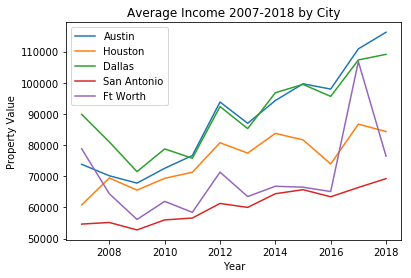

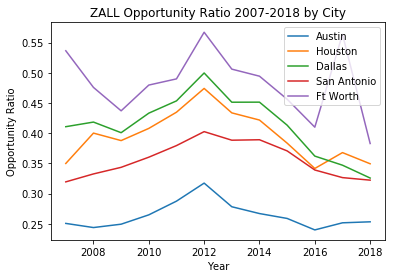

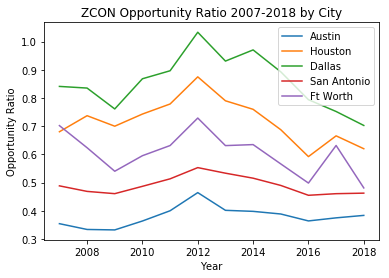

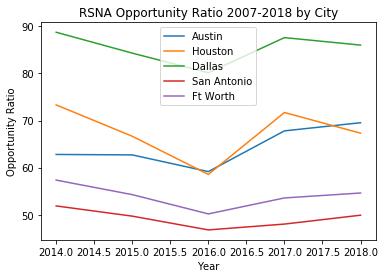

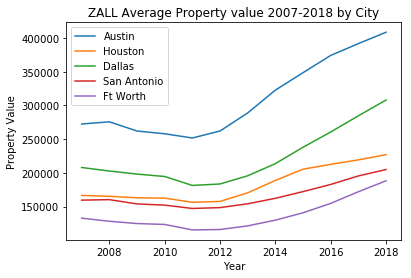

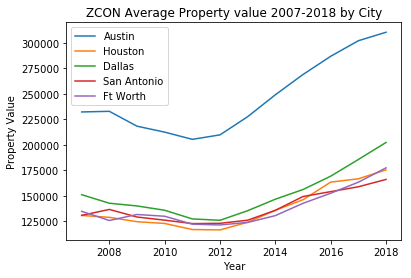

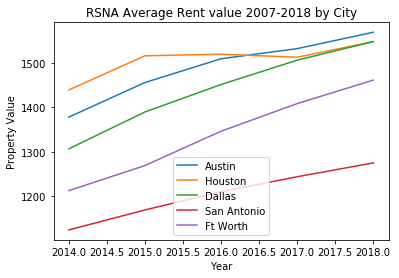

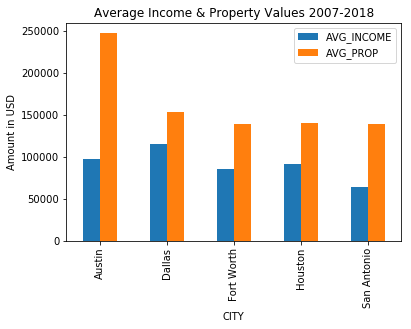

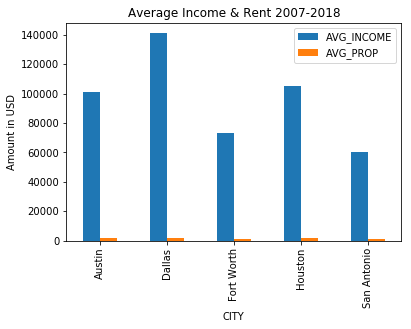

In [11]:
# Dashboard Title
dashboard_title = "# Real Estate & Income 2007-2018 for major Texas cities"

Income = pn.Column(
    avg_income
)
Opp_Ratio = pn.Column(
    zall_or,
    zcon_or,
    rsna_or
)

Prop_values = pn.Column(
    zall_prop,
    zcon_prop,
    rsna_prop
)

AGI_v_prop = pn.Column(
     zall_agi_v_prop(),
     zcon_agi_v_prop(),
     rsna_agi_v_prop()
 )

In [12]:
choro_row1 = pn.Row("../notebooks/images/ZALL/houston.gif", "../notebooks/images/ZALL/austin.gif")
choro_row2 = pn.Row("../notebooks/images/ZALL/dfw.gif", "../notebooks/images/ZALL/sa.gif")
choro_col = pn.Column(choro_row1, choro_row2)

condo_row1 = pn.Row("../notebooks/images/condo_zcon/houston.gif", "../notebooks/images/condo_zcon/austin.gif")
condo_row2 = pn.Row("../notebooks/images/condo_zcon/dfw.gif", "../notebooks/images/condo_zcon/sa.gif")
condo_col = pn.Column(condo_row1, condo_row2)

rsna_row1 = pn.Row("../notebooks/images/rental_rsna/houston.gif", "../notebooks/images/rental_rsna/austin.gif")
rsna_row2 = pn.Row("../notebooks/images/rental_rsna/dfw.gif", "../notebooks/images/rental_rsna/sa.gif")
rsna_col = pn.Column(rsna_row1, rsna_row2)

choropleth = pn.Tabs(
    ("ZALL", choro_col),
    ("Condos", condo_col),
    ("Rentals", rsna_col)
)

zall_col = pn.Column("# ZALL data",interact(ZALL_map,year=range(2007,2018)))
zcon_col = pn.Column("# ZCON data",interact(ZCON_map,year=range(2007,2018)))
rsna_col = pn.Column("# RSNA data",interact(RSNA_map,year=range(2014,2018)))
maps= pn.Tabs(
    ("ZALL",zall_col),
    ("ZCON",zcon_col),
    ("RSNA",rsna_col)
)

In [13]:
# Tab layout (pn.Tabs)
real_est = pn.Tabs(
    ("Income", Income),
    ("Opportunity", Opp_Ratio),
    ("Property Values", Prop_values),    
    ("AGI vs Prop", AGI_v_prop),
    ("Mapbox", maps),
    ("Choropleth", choropleth)
)
real_est_dash = pn.Column(dashboard_title, real_est) 

In [14]:
# Execute using servable
real_est_dash.servable()

In [15]:
test = pn.Tabs(
    ("Tab 1", pn.Column("Test 1")),
    ("Tab 2", pn.Column("Test 2")),
    ("Tab 3", pn.Column("Test 3")))

In [16]:
test

Tabs
    [0] Column
        [0] Markdown(str)
    [1] Column
        [0] Markdown(str)
    [2] Column
        [0] Markdown(str)

In [17]:
test.servable()

Tabs
    [0] Column
        [0] Markdown(str)
    [1] Column
        [0] Markdown(str)
    [2] Column
        [0] Markdown(str)